In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [2]:
class AgentState(TypedDict):
    num1 : int
    num2 : int
    operation1 : str
    finalNum1 : int
    num3 : int
    num4 : int
    operation2 : str
    finalNum2 : str

In [3]:
def add_node(state : AgentState) -> AgentState:
    """This node helps in adding the two numbers"""

    state['finalNum1'] = state['num1'] + state['num2']

    return state

def sub_node(state : AgentState) -> AgentState:
    """This node helps in substracting the two numbers"""

    state['finalNum1'] = state['num1'] - state['num2'] 

    return state

def add_node2(state : AgentState) -> AgentState:
    """This node helps in adding the two numbers"""

    state['finalNum2'] = state['num3'] + state['num4']

    return state

def sub_node2(state : AgentState) -> AgentState:
    """This node helps in substracting the two numbers"""

    state['finalNum2'] = state['num3'] - state['num4'] 

    return state

def decide_next_node1(state : AgentState) -> AgentState:
    """This node will select the next node of the graph"""

    if state["operation1"] == "+":
        return "addition_operation"

    elif state["operation1"] == "-":
        return "substraction_operation"

def decide_next_node2(state : AgentState) -> AgentState:
    """This node will select the next node of the graph"""

    if state["operation2"] == "+":
        return "addition_operation"

    elif state["operation2"] == "-":
        return "substraction_operation"

    
    

In [5]:
graph = StateGraph(AgentState)

graph.add_node("add_node", add_node)
graph.add_node("sub_node", sub_node)
graph.add_node("add_node2", add_node2)
graph.add_node("sub_node2", sub_node2)
graph.add_node("router", lambda state:state)
graph.add_node("router2", lambda state:state)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node1,
    {
        "addition_operation" : "add_node",
        "substraction_operation" : "sub_node"
    }
)

graph.add_edge("add_node","router2")
graph.add_edge("sub_node","router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "addition_operation" : "add_node2",
        "substraction_operation" : "sub_node2"
    }
)

graph.add_edge("add_node2",END)
graph.add_edge("sub_node2",END)

app = graph.compile()


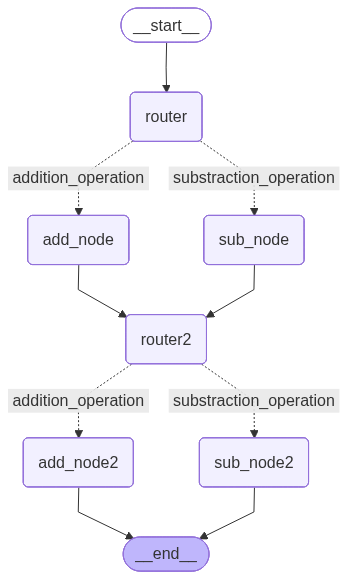

In [6]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
initial_state_1 = AgentState(num1=12,num2=2,operation1="+",num3= 34, num4=3, operation2="-")
app.invoke(initial_state_1)

{'num1': 12,
 'num2': 2,
 'operation1': '+',
 'finalNum1': 14,
 'num3': 34,
 'num4': 3,
 'operation2': '-',
 'finalNum2': 31}